<a href="https://colab.research.google.com/github/pramudyas69/Detection-Hijab-Using-CNN/blob/main/Deteksi_Ukhti_Or_No.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os

In [2]:
# Cara 2 : Load data dari Github
!git clone https://github.com/mnajamudinridha/naja-dataset.git

Cloning into 'naja-dataset'...
remote: Enumerating objects: 10929, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 10929 (delta 2), reused 56 (delta 2), pack-reused 10872
Receiving objects: 100% (10929/10929), 352.18 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (30857/30857), done.


In [7]:
base_dir = 'naja-dataset/dataset-5000'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
os.listdir('naja-dataset/dataset-5000/train')
os.listdir('naja-dataset/dataset-5000/val')

['nonhijab', 'hijab']

In [9]:
train_nonhijab_dir = os.path.join(train_dir, 'nonhijab')
train_hijab_dir = os.path.join(train_dir, 'hijab')
 
validation_nonhijab_dir = os.path.join(validation_dir, 'nonijab')
validation_hijab_dir = os.path.join(validation_dir, 'hijab')

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255, 
  zoom_range=0.2,
  shear_range=0.2,  
  horizontal_flip=True)

test_datagen = ImageDataGenerator(
  rescale=1./255, 
  zoom_range=0.2, 
  shear_range=0.2, 
  horizontal_flip=True) 

In [12]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(224, 224),
  batch_size=32, 
  color_mode='rgb', #
  class_mode='binary', 
  shuffle = True, 
  seed=42) 
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=32,
  color_mode='rgb',
  class_mode='binary',
  shuffle = True,
  seed=42)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
sample_images_train, _ = next(train_generator)
sample_images_val, _ = next(validation_generator)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
result = model.fit(train_generator, 
          steps_per_epoch=25, 
          epochs=15, 
          validation_data=validation_generator,
          validation_steps=5,
          verbose=1)

Epoch 1/15
25/25 [==============================] - 25s 589ms/step - loss: 0.7123 - accuracy: 0.5700 - val_loss: 0.5952 - val_accuracy: 0.8062
Epoch 2/15
25/25 [==============================] - 14s 575ms/step - loss: 0.5564 - accuracy: 0.7462 - val_loss: 0.4996 - val_accuracy: 0.7500
Epoch 3/15
25/25 [==============================] - 14s 569ms/step - loss: 0.4521 - accuracy: 0.8062 - val_loss: 0.2372 - val_accuracy: 0.9187
Epoch 4/15
25/25 [==============================] - 14s 552ms/step - loss: 0.4044 - accuracy: 0.8425 - val_loss: 0.2948 - val_accuracy: 0.9000
Epoch 5/15
25/25 [==============================] - 14s 554ms/step - loss: 0.3591 - accuracy: 0.8400 - val_loss: 0.2385 - val_accuracy: 0.9187
Epoch 6/15
25/25 [==============================] - 14s 559ms/step - loss: 0.2812 - accuracy: 0.8750 - val_loss: 0.2301 - val_accuracy: 0.9312
Epoch 7/15
25/25 [==============================] - 14s 568ms/step - loss: 0.2795 - accuracy: 0.8875 - val_loss: 0.2636 - val_accuracy: 0.8938

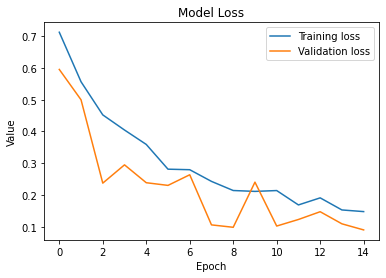

In [22]:
#Loss Plot
from matplotlib import pyplot as plt

plt.plot(result.history['loss'], label ='Training loss')
plt.plot(result.history['val_loss'], label = 'Validation loss')
plt.title('Model Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

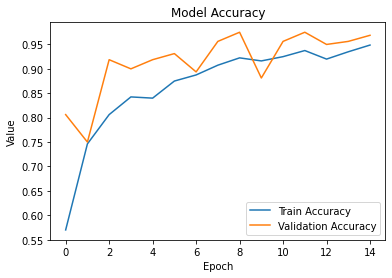

In [23]:
#Accuracy Plot
plt.plot(result.history['accuracy'], label = 'Train Accuracy')
plt.plot(result.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Saving hijab.4005.jpg to hijab.4005.jpg
Ukhti


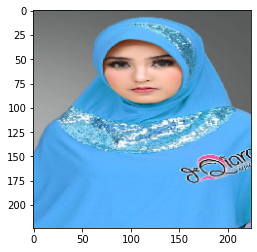

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
myimage = files.upload()
 
for fn in myimage.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  if classes == 0:
    print('Ukhti')
  else :
    print('Pemersatu Bangsa')

In [33]:
!git clone https://github.com/pramudyas69/Detection-Hijab-With-CNN.git

Cloning into 'Detection-Hijab-With-CNN'...


In [34]:
!ls

 Detection-Hijab-With-CNN   hijab.4005.jpg   nonhijab.0001.jpg
'hijab.0001 (1).jpg'	    hijaboy.jpg      nonhijab.4004.jpg
'hijab.0001 (2).jpg'	    hj.jpg	     nonhijab.JPG
 hijab.0001.jpg		    naja-dataset     sample_data


In [35]:
!cd Detection-Hijab-With-CNN/

 Detection-Hijab-With-CNN   hijab.4005.jpg   nonhijab.0001.jpg
'hijab.0001 (1).jpg'	    hijaboy.jpg      nonhijab.4004.jpg
'hijab.0001 (2).jpg'	    hj.jpg	     nonhijab.JPG
 hijab.0001.jpg		    naja-dataset     sample_data
